In [1]:
# module to interact with data
import pandas as pd

In [2]:
# module for ploting graphs
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('owid-covid-data.csv')

In [4]:
# checking columns
print("----Columns---")
i = 1
for column in df.columns:
    print(f"{i}. {column}")
    i += 1

----Columns---
1. iso_code
2. continent
3. location
4. date
5. total_cases
6. new_cases
7. new_cases_smoothed
8. total_deaths
9. new_deaths
10. new_deaths_smoothed
11. total_cases_per_million
12. new_cases_per_million
13. new_cases_smoothed_per_million
14. total_deaths_per_million
15. new_deaths_per_million
16. new_deaths_smoothed_per_million
17. reproduction_rate
18. icu_patients
19. icu_patients_per_million
20. hosp_patients
21. hosp_patients_per_million
22. weekly_icu_admissions
23. weekly_icu_admissions_per_million
24. weekly_hosp_admissions
25. weekly_hosp_admissions_per_million
26. total_tests
27. new_tests
28. total_tests_per_thousand
29. new_tests_per_thousand
30. new_tests_smoothed
31. new_tests_smoothed_per_thousand
32. positive_rate
33. tests_per_case
34. tests_units
35. total_vaccinations
36. people_vaccinated
37. people_fully_vaccinated
38. total_boosters
39. new_vaccinations
40. new_vaccinations_smoothed
41. total_vaccinations_per_hundred
42. people_vaccinated_per_hundred

In [5]:
# rows preview
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
# missing values
df.isnull().sum()

iso_code                                        0
continent                                   16673
location                                        0
date                                            0
total_cases                                 38020
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337924
excess_mortality_cumulative                337924
excess_mortality                           337924
excess_mortality_cumulative_per_million    337924
Length: 67, dtype: int64

In [7]:
# filtering the data
countries_of_interest = ['Kenya', 'USA', 'China', 'Brazil', 'India', 'France', 'Russia']
filtered_df = df[df['location'].isin(countries_of_interest)]

In [8]:
# Converting date column to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

/tmp/ipykernel_160723/1069946862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


In [9]:
# Handling missing numeric values
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').fillna(0)

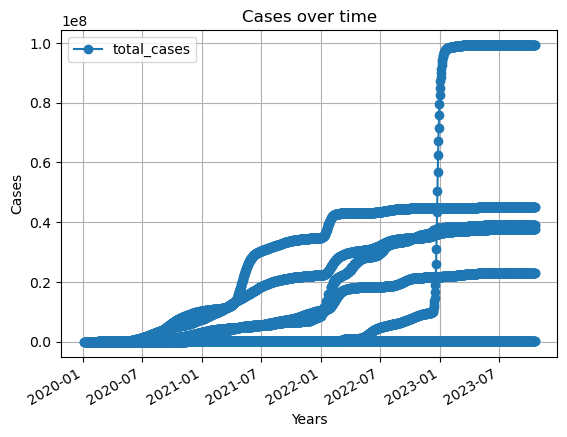

In [10]:
# a plot for cases over time
filtered_df.plot(x="date", y="total_cases", kind="line", marker="o")
plt.title("Cases over time")
plt.xlabel("Years")
plt.ylabel("Cases")
plt.grid(True)
plt.show()

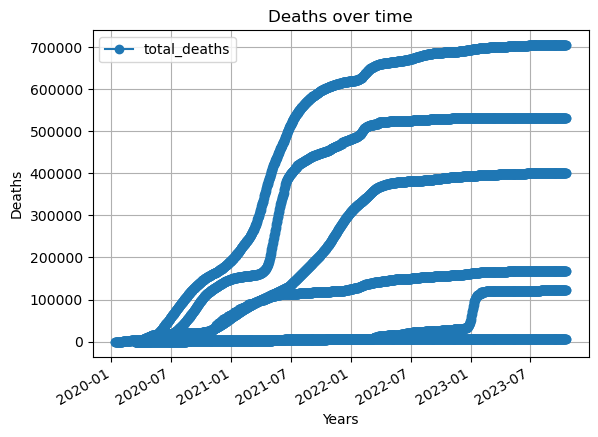

In [11]:
# a plot for deaths over time
filtered_df.plot(x="date", y="total_deaths", kind="line", marker="o")
plt.title("Deaths over time")
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()

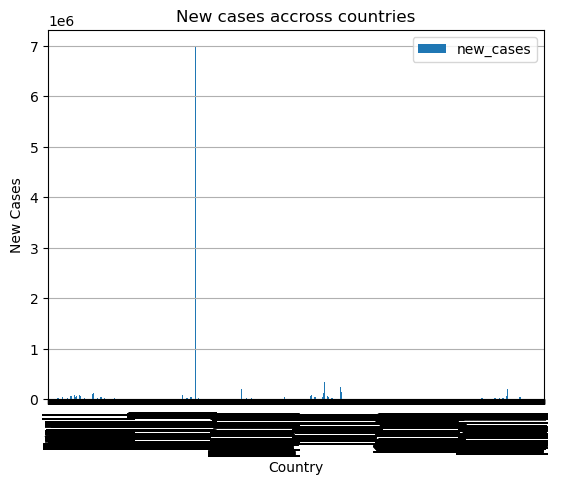

In [12]:
# new cases between the countries
filtered_df.plot(kind="bar", x="location", y="new_cases")
plt.title("New cases accross countries")
plt.xlabel("Country")
plt.ylabel("New Cases")
plt.grid(axis='y')
plt.show()

In [13]:
# calculating the rate of death
print(filtered_df['total_deaths'] / filtered_df['total_cases'])

41571          NaN
41572          NaN
41573          NaN
41574          NaN
41575          NaN
            ...   
257581    0.017349
257582    0.017349
257583    0.017349
257584    0.017349
257585    0.017349
Length: 8316, dtype: float64


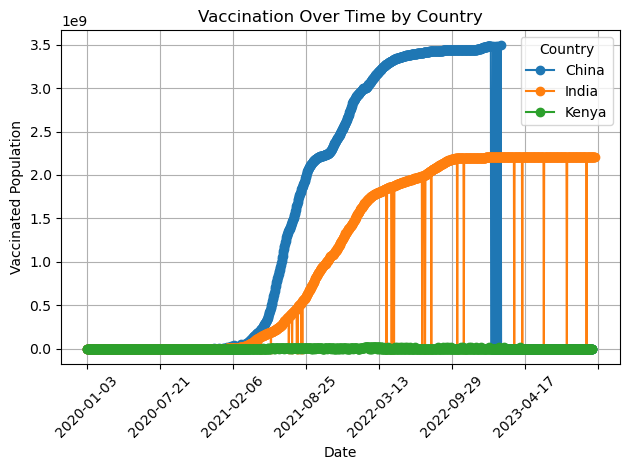

In [16]:
# vaccination over time
comparing_countries = ['Kenya', 'India', 'China']

new_df = df[df['location'].isin(comparing_countries)]
new_df_pivot = new_df.pivot(index='date', columns='location', values='total_vaccinations')

new_df_pivot.plot(marker='o')  # Automatically plots each column as a line
plt.xlabel('Date')
plt.ylabel('Vaccinated Population')
plt.title('Vaccination Over Time by Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Narative explanation

China has the most vaccinations

Kenya has very low vaccinations

China stopped vaccinations in 2022